In [18]:
import matplotlib.pyplot as plt
from astroquery.alma import Alma
%qtconsole --style monokai 
%matplotlib inline

In [14]:
alma = Alma()
alma.login("equant", store_password=True)

INFO: Authenticating equant on asa.alma.cl ... [astroquery.alma.core]
INFO: Authentication successful! [astroquery.alma.core]


True

In [15]:
alma_observations = alma.query({"start_date" : ">01-01-2011"}, cache=True)

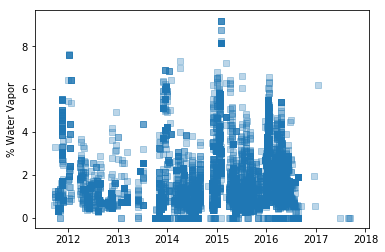

In [89]:
# Here's what my date time string looks like: 2016-04-16 21:40:02
import datetime
date_strings = alma_observations['Observation date']
#datetime.datetime.strptime(observation_date, "%Y-%m-%d %H:%M:%S.%f")
observation_dates = [datetime.datetime.strptime(item.decode(), '%Y-%m-%d %H:%M:%S').date() for item in date_strings]
release_date_strings = alma_observations['Release date']
release_dates = [datetime.datetime.strptime(item.decode(), '%Y-%m-%d').date() for item in release_date_strings]
water_vapor       = alma_observations['PWV']
plt.scatter(observation_dates, water_vapor, alpha=0.3, marker=',')
plt.ylabel("% Water Vapor")
plt.savefig("/home/equant/foo.pdf")

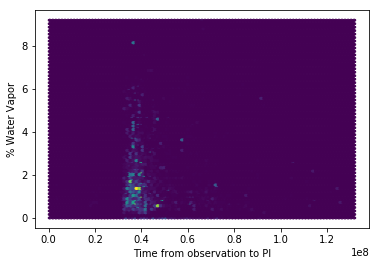

In [82]:
pipeline_times = []
for idx, rd in enumerate(release_dates):
    pd = rd - observation_dates[idx]
    pipeline_times.append(pd.total_seconds())
    
plt.hexbin(pipeline_times, water_vapor)
plt.xlabel("Time from observation to PI")
plt.ylabel("% Water Vapor")